In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Course Changes
## 1. Grading Policy
**Before**
- Participation & In-class activities: 10%
- Homework and Quizzes: 30%
- Midterm Project: 30%
- Final Project: 30%

**Now**
- Participation & In-class activities: 10%
- Homework: 20%
- Midterm Project: 35%
- Final Project: 35%

## 2. Online Office Hour: 12:40pm - 2:00pm

## 3. Cancellation of Test 1


## Logistic Regression: Training Algorithm

**Cost (loss) function** for logistic regression:

\begin{equation}
c(\theta) = \left\{
\begin{array}{cc}
-\log(\hat{p}) & \textit{if }y=1,\\
-\log(1-\hat{p}) & \textit{if }y=0.
\end{array}
\right.
\end{equation}

The cost function $c(\theta)$:

- small if $y=1$ (data example belongs to the class) and $\hat{p}$ is close to 1.
- small if $y=0$ (data example does not belong to the class) and $\hat{p}$ is close to 0.
- is a convex function, so that the gradient descent method always finds the minimum.

**Uniformed expression for the cost function**:

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\big[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\big]$

- $c(\theta) = J(\theta)$ for $y=0$ and $y=1$.
- There is no equivalent of the Normal Equation.
- $J(\theta)$ is a convex function.
- $\frac{\partial J}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}\big(\sigma(\textbf{x}^{(i)}\cdot\theta^T) - y^{(i)}\big)x_j^{(i)}$.

**Question**: Why not use the mean-square-error (MSE) cost function?
Answer: The cost function built with MSE is not convex for logistic regression.

## Logistic Regression: Varying The Threshold
We can change the default threshold to improve classification accuracy of one particular class. The tradeoff usually is the reduced accuracy on the other class. 
- An **Receiver Operating Characteristics (ROC)** can be used to show such tradeoffs.
    - x-axis: true positive rate (= true positive / (true positive + false negative))
    - true positive rate is the percentage of correct predictions among all class 1 instances.
    - y-axis: false positive rate (= false positive / (true negative + false positive))
    - false positive rate is the percentage of wrong predictions among all class 0 instances.
- The **Area Under Curve (AUC)** score of the ROC curve is often used to measure the quality of the model:
    - AUC close to 1: The model give satisfactory classification results for most choices of thresholds.
    - AUC close to 0.5: The model does poorly for most thresholds.


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Load the iris data
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']

def get_target_name(x):
    return iris['target_names'][x]

iris_df['target_name'] = iris_df['target'].apply(get_target_name)

def is_virginica(target):
    if target == 'virginica':
        return 1
    else:
        return 0
    
iris_df['Is_Virginica'] = iris_df['target_name'].apply(is_virginica)

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Is_Virginica
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


In [6]:
# Build logistic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(iris_df.iloc[:, :4], iris_df['Is_Virginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
probs = model.predict_proba(iris_df.iloc[:, :4])
print(probs)

[[9.99998823e-01 1.17651820e-06]
 [9.99998354e-01 1.64562311e-06]
 [9.99998801e-01 1.19871885e-06]
 [9.99997641e-01 2.35892535e-06]
 [9.99998837e-01 1.16261302e-06]
 [9.99996675e-01 3.32532938e-06]
 [9.99998079e-01 1.92096293e-06]
 [9.99998273e-01 1.72706818e-06]
 [9.99997890e-01 2.10997626e-06]
 [9.99998354e-01 1.64569474e-06]
 [9.99998736e-01 1.26445883e-06]
 [9.99997495e-01 2.50528273e-06]
 [9.99998656e-01 1.34427430e-06]
 [9.99999320e-01 6.79645692e-07]
 [9.99999616e-01 3.84274180e-07]
 [9.99998728e-01 1.27174602e-06]
 [9.99998970e-01 1.02965205e-06]
 [9.99998502e-01 1.49820684e-06]
 [9.99997558e-01 2.44210286e-06]
 [9.99998278e-01 1.72177182e-06]
 [9.99997349e-01 2.65069071e-06]
 [9.99997692e-01 2.30803682e-06]
 [9.99999578e-01 4.21514910e-07]
 [9.99993514e-01 6.48579586e-06]
 [9.99993964e-01 6.03551167e-06]
 [9.99997157e-01 2.84296683e-06]
 [9.99996246e-01 3.75440767e-06]
 [9.99998484e-01 1.51619179e-06]
 [9.99998809e-01 1.19058968e-06]
 [9.99997112e-01 2.88785566e-06]
 [9.999970

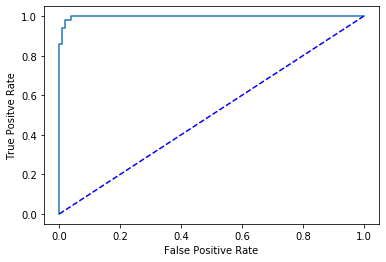

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(iris_df['Is_Virginica'], probs[:, 1])

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')

# worse case: tpr increases along with fpr
plt.plot([0, 1], [0, 1], 'b--')

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(iris_df['Is_Virginica'], probs[:, 1])

# close to 1: the model's performance is very good for all types of thresholds.
# close to 0.5: the model's performace is poor

0.9975999999999999

## Logistic Regression for Multiple Classes (Softmax regression)
**model**:

$\hat{p}_k = \frac{\exp(s_k(\textbf{x}))}{\sum_{i=1}^K\exp(s_i(\textbf{x}))}$.

$s_k(\textbf{x}) = \textbf{x}\cdot\theta_k^T$

- $\hat{p}_k$ is the probability that the instance belongs to class $k$.
- K is the number of classes.
- $\theta_k$ is the coefficient vector associated with class $k$. All these vectors are stored as rows in a parameter matrix $\Theta$.
- The softmax classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

**Cross entropy cost function**

$J(\Theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K
y_k^{(i)}\log(\hat{p}_k^{(i)})$

- $y_k^{(i)}$ is equal to 1 if the target for the i-th instance is $k$; otherwise, it is equal to 0.


## Classifying Iris Data

In [2]:
# Train-test split
from sklearn.model_selection import train_test_split



In [1]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression



In [3]:
# Calculate the training accuracy and testing accuracy
from sklearn.metrics import accuracy_score



In [4]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix



In [ ]:
# Perform 3-fold cross validation
from sklearn.model_selection import cross_val_score



In [ ]:
# Plot ROC curve for each class



## Homework:

1. Divide the dataset randomly into 80% training set and 20% test set, and build a logistic classifier to identify Iris-Setosa using the petal width and petal length. 
2. Calculate test accuracy, precision, recall, f1-score.
3. Plot the ROC curve and calculate AUC.
4. (optional for undergraduates) Build a grid of points using `np.meshgrid` and use their probabilities to draw the decision boundary of the model.